# 1.1 Introduction

# Workflow Step–by–Step¶

The program above can be broken down into six steps:

1. Import packages

2. Initialize variables

3. Add gates

4. Visualize the circuit

5. Simulate the experiment

6. Visualize the results

### Step 1: Import Packages¶

The basic elements needed for your program are imported as follows:

In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

In more detail, the imports are

QuantumCircuit: can be thought as the instructions of the quantum system. It holds all your quantum operations.

AerSimulator: is the Aer high performance circuit simulator.

plot_histogram: creates histograms.

### Step 2: Initialize Variables¶
Consider the next line of code

In [2]:
circuit = QuantumCircuit(2, 2)

Here, you are initializing with 2 qubits in the zero state; with 2 classical bits set to zero; and circuit is the quantum circuit.

Syntax:

QuantumCircuit(int, int)

### Step 3: Add Gates¶

You can add gates (operations) to manipulate the registers of your circuit.

Consider the following three lines of code:

In [3]:
circuit.h(0)
circuit.cx(0, 1)
circuit.measure([0, 1], [0, 1])

The gates are added to the circuit one-by-one to form the Bell state

The code above applies the following gates:

QuantumCircuit.h(0): A Hadamard gate 
 on qubit 0, which puts it into a superposition state.

QuantumCircuit.cx(0, 1): A controlled-Not operation (
) on control qubit 0 and target qubit 1, putting the qubits in an entangled state.

QuantumCircuit.measure([0,1], [0,1]): if you pass the entire quantum and classical registers to measure, the ith qubit’s measurement result will be stored in the ith classical bit.

### Step 4: Visualize the Circuit¶

You can use qiskit.circuit.QuantumCircuit.draw() to view the circuit that you have designed in the various forms used in many textbooks and research articles.

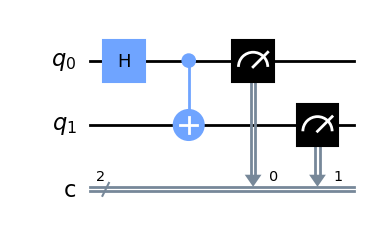

In [4]:
circuit.draw("mpl")

In this circuit, the qubits are ordered with qubit zero at the top and qubit one at the bottom. The circuit is read left-to-right, meaning that gates which are applied earlier in the circuit show up farther to the left.

The default backend for QuantumCircuit.draw() or qiskit.visualization.circuit_drawer() is the text backend. However, depending on your local environment you may want to change these defaults to something better suited for your use case. This is done with the user config file. By default the user config file should be located in ~/.qiskit/settings.conf and is a .ini file.

For example, a settings.conf file for setting a Matplotlib drawer is:

[default]

circuit_drawer = mpl

You can use any of the valid circuit drawer backends as the value for this config, this includes text, mpl, latex, and latex_source.

### Step 5: Simulate the Experiment¶

Qiskit Aer is a high performance simulator framework for quantum circuits. It provides several backends to achieve different simulation goals.

If you have issues installing Aer, you can alternatively use the Basic Aer provider by replacing Aer with BasicAer. Basic Aer is included in Qiskit Terra.

In [5]:
from qiskit import QuantumCircuit, transpile
from qiskit.providers.basicaer import QasmSimulatorPy

To simulate this circuit, you will use the AerSimulator. Each run of this circuit will yield either the bit string 00 or 11.

In [6]:
simulator = AerSimulator()
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)


Total count for 00 and 11 are: {'00': 455, '11': 545}


As expected, the output bit string is 00 approximately 50 percent of the time. The number of times the circuit is run can be specified via the shots argument of the execute method. The number of shots of the simulation was set to be 1000 (the default is 1024).

Once you have a result object, you can access the counts via the method get_counts(circuit). This gives you the aggregate outcomes of the experiment you ran.

### Step 6: Visualize the Results¶

Qiskit provides many visualizations,

including the function plot_histogram, to view your results.

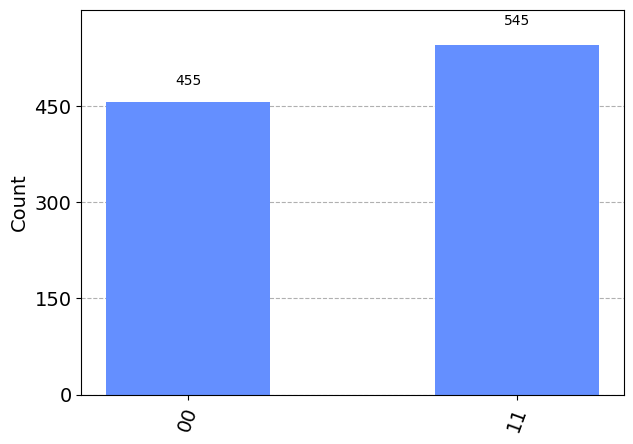

In [7]:
plot_histogram(counts)

The observed probabilities 
 and 
 are computed by taking the respective counts and dividing by the total number of shots.

Source:
https://qiskit.org/documentation/intro_tutorial1.html